In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from utils import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

label_dict = { 0: "T-Shirt/Top",
               1: "Trouser",
               2: "Pullover",
               3: "Dress",
               4: "Coat",
               5: "Sandal",
               6: "Shirt",
               7: "Sneaker",
               8: "Bag",
               9: "Ankle Boot"}

In [11]:
print(f'X_test Shape: {X_test.shape}\ny_test Shape: {y_test.shape}\nX_train Shape: {X_train.shape}\ny_train Shape: {y_train.shape}')

X_test Shape: (10000, 784)
y_test Shape: (10000,)
X_train Shape: (60000, 784)
y_train Shape: (60000,)


In [12]:
# Create validation sets from the first 10,000 images
X_val = X_train[:10000]
y_val = y_train[:10000]

# Start training sets from the 10,001th image to accomodate validation set
X_train = X_train[10000:]
y_train = y_train[10000:] 

# Start training sets from the 10,001th image to the 20,000th image as a subset of the data
X_train_subset = X_train[10000:20000]
y_train_subset = y_train[10000:20000]

In [13]:
def visualize(y_labels: np.array) -> None:
    # Some default settings for our plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'

    # Create a figure with 3 rows and 3 columns
    figure, axes = plt.subplots(3, 3, figsize=(6, 6))  

    n = 0
    for row in range(len(axes)):
        for col in range(len(axes[0])):
            axes[row][col].set_title(f' Label: {label_dict[y_labels[n]]}')
            axes[row][col].imshow(X_train[n].reshape(28, 28))
            n += 1

    plt.tight_layout()

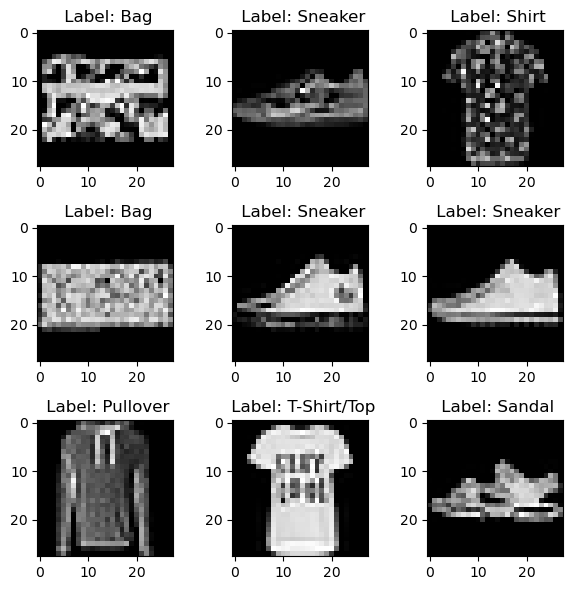

In [14]:
visualize(y_train)

In [ ]:
cs = [1.0, 0.75, 0.5, 0.25, 0.1, 0.05, 0.01]

train_accuracies = []
test_accuracies = []

classifier = StandardScaler()
classifier.fit(X_train_subset, y_train_subset)

X_train_subset = classifier.transform(X_train_subset)
X_val = classifier.transform(y_train_subset)


for c in cs:
    lr = LogisticRegression(penalty="l2", C = c, max_iter= 1000, solver="sag").fit(X_train_subset[:5000], y_train_subset[:5000])
    # print('finished')
    y_lr_pred = lr.predict(X_train_subset) 
    y_val_pred = lr.predict(X_val)

    train_score = accuracy_score(y_lr_pred, y_train_subset)
    val_score = accuracy_score(y_val_pred, y_val)

    train_accuracies.append(train_score)
    test_accuracies.append(val_score)

    # visualize(y_lr_pred)
    print(f'C = {c} training score--> {train_score}')
    print(f'C = {c} validation score--> {val_score}')


fig, axes = plt.subplots()
axes.semilogx(cs, train_accuracies, color='red', label='training accuracy')
axes.semilogx(cs, test_accuracies, color='blue', label='testing accuracy')

axes.set_xlabel('regularization strength', fontsize=14)
axes.set_ylabel('accuracy', fontsize=14)

axes.legend()



Liblinear L1 Logistic Regression Training Score: 0.8804
Liblinear L1 Logistic Regression Validation Score: 0.8165


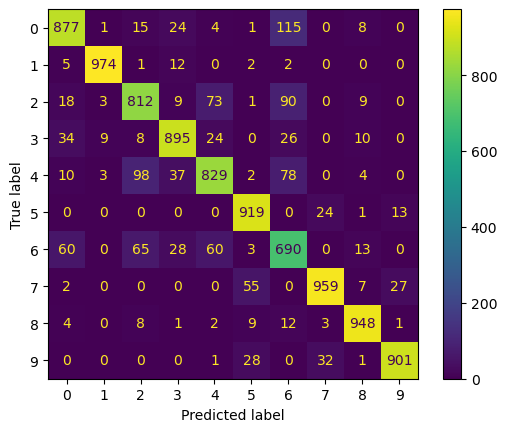

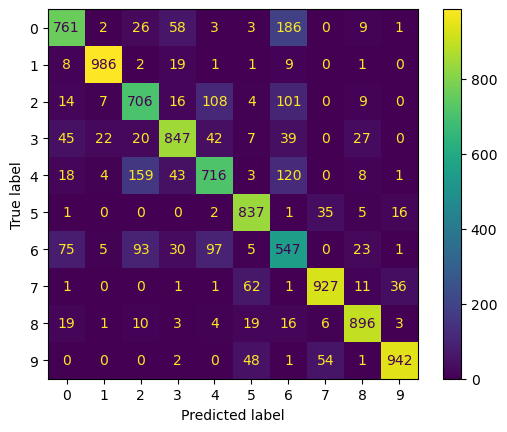

In [16]:
lr = LogisticRegression(penalty="l1", C = 0.01, max_iter= 250, solver="liblinear").fit(X_train_subset[:5000], y_train_subset[:5000])
y_lr_pred = lr.predict(X_train_subset) 
y_val_pred = lr.predict(X_val)

train_score = accuracy_score(y_lr_pred, y_train_subset)
val_score = accuracy_score(y_val_pred, y_val)

print(f'Liblinear L1 Logistic Regression Training Score: {train_score}')
print(f'Liblinear L1 Logistic Regression Validation Score: {val_score}')
train_matrix = ConfusionMatrixDisplay(confusion_matrix(y_lr_pred, y_train_subset), display_labels=lr.classes_)
val_matrix = ConfusionMatrixDisplay(confusion_matrix(y_val_pred, y_val), display_labels=lr.classes_)

train_matrix.plot()
val_matrix.plot()

ns = [1,2,3,4,5,6,7,8,9,10, 12, 20, 50, 100, 500, 1000]

train_accuracies = []
test_accuracies = []

classifier = StandardScaler()
classifier.fit(X_train_subset, y_train_subset)


for n in ns:
    #n_neighbors default = 5
    #weights = "uniform"
    #algorithm = "auto"
    #leaf_size = 30 -> doesn't affect outcome of queries
    #metric = minkowski
    
    kn = KNeighborsClassifier(n_neighbors = n, weights = "distance", metric="manhattan").fit(X_train_subset[:5000], y_train_subset[:5000])
    # print('finished')
    y_kn_pred = kn.predict(X_train_subset) 
    y_val_pred = kn.predict(X_val)

    train_score = accuracy_score(y_kn_pred, y_train_subset)
    val_score = accuracy_score(y_val_pred, y_val)

    train_accuracies.append(train_score)
    test_accuracies.append(val_score)

    # visualize(y_lr_pred)
    print(f'k = {n} training score -->{train_score}')
    print(f'k = {n} validation score -->{val_score}')

6-NearestNeighbors Distance Weight Training Score: 0.9034
6-NearestNeighbors Distance Weight Validation Score: 0.8101


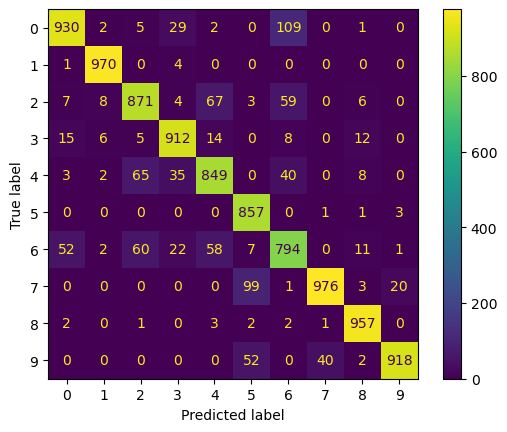

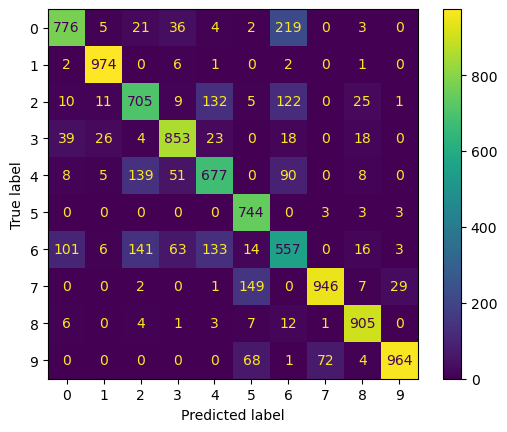

In [20]:
kn = KNeighborsClassifier(n_neighbors = 6, weights = "distance").fit(X_train_subset[:5000], y_train_subset[:5000])
y_kn_pred = kn.predict(X_train_subset) 
y_val_pred = kn.predict(X_val)

train_score = accuracy_score(y_kn_pred, y_train_subset)
val_score = accuracy_score(y_val_pred, y_val)

print(f'6-NearestNeighbors Distance Weight Training Score: {train_score}')
print(f'6-NearestNeighbors Distance Weight Validation Score: {val_score}')
train_matrix = ConfusionMatrixDisplay(confusion_matrix(y_kn_pred, y_train_subset), display_labels=kn.classes_)
val_matrix = ConfusionMatrixDisplay(confusion_matrix(y_val_pred, y_val), display_labels=kn.classes_)

train_matrix.plot()
val_matrix.plot()